# ARIMA model

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("/content/DEXINUS_edited()_final.csv",index_col= 'Date', parse_dates=True)

df.head()
 

,Value
Date,
1973-02-01,8.02
1973-03-01,8.02
1973-04-01,8.00
1973-05-01,8.01
1973-08-01,8.00


In [3]:
df.shape

(12649, 1)

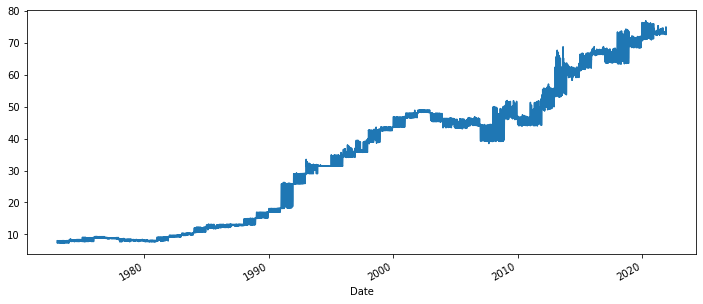

In [4]:
df['Value'].plot(figsize=(12,5))

In [5]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 9.5 MB 53.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [6]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")

Get best p,d,q value for ARIMA model The goal is to minimize the AIC and get the best order with the lowest AIC

In [7]:
stepwise_fit = auto_arima(df['Value'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8087.230, Time=28.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8023.371, Time=3.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8035.412, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8036.942, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8014.239, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8061.265, Time=17.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8063.398, Time=12.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8071.131, Time=19.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8103.478, Time=29.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8059.122, Time=9.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8100.887, Time=25.32 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8102.195, Time=38.51 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8086.583, Time=27.00 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-8099.317, Time=49.05 sec
 ARIMA(2,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12649
Model:               SARIMAX(2, 1, 3)   Log Likelihood                4058.739
Date:                Thu, 19 Aug 2021   AIC                          -8103.478
Time:                        09:22:52   BIC                          -8051.362
Sample:                             0   HQIC                         -8086.041
                              - 12649                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0064      0.002      3.390      0.001       0.003       0.010
ar.L1          0.5843      0.028     20.647      0.000       0.529       0.640
ar.L2         -0.8157      0.018    -44.810      0.000      -0.851      -0.780
ma.L1         -0.6209      0.029    -21.746      0.000      -0.677      -0.565
ma.L2          0.7933      0.020     38.757      0.000       0.753       0.833
ma.L3         -0.0114      0.006     -2.057      0.040      -0.022      -0.001
sigma2         0.0308   8.83e-05    348.799      0.000       0.031       0.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            893443.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              29.31   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
print(df.shape)

(12649, 1)


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(df.Value)

(0.6320006223926241,
 0.9883783969303007,
 37,
 12611,
 {'1%': -3.4308686449575485,
  '10%': -2.56689200640251,
  '5%': -2.8617692154460714},
 -8076.628404652416)

In [12]:
from statsmodels.tsa.arima_model import ARIMA
train=df.iloc[:-2649]
test=df.iloc[-2649:]
print(train.shape, test.shape)

(10000, 1) (2649, 1)


In [13]:
model = ARIMA(train['Value'],order=(2,1,3) )
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                 9999
Model:                 ARIMA(2, 1, 3)   Log Likelihood                6204.851
Method:                       css-mle   S.D. of innovations              0.130
Date:                Thu, 19 Aug 2021   AIC                         -12395.702
Time:                        09:24:29   BIC                         -12345.231
Sample:                             1   HQIC                        -12378.618
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036      0.001      2.947      0.003       0.001       0.006
ar.L1.D.Value    -1.3934      0.144     -9.661      0.000      -1.676      -1.111
ar.L2.D.Value    -0.5990      0.150     -3.997      0.000      -0.893      -0.305
ma.L1.D.Value     1.3270      0.145      9.176      0.000       1.044       1.610
ma.L2.D.Value     0.5172      0.142      3.646      0.000       0.239       0.795
ma.L3.D.Value    -0.0140      0.017     -0.839      0.401      -0.047       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1632           -0.5627j            1.2921           -0.4283
AR.2           -1.1632           +0.5627j            1.2921            0.4283
MA.1           -1.2260           -0.5567j            1.3464           -0.4322
MA.2           -1.2260           +0.5567j            1.3464            0.4322
MA.3           39.3037           -0.0000j           39.3037           -0.0000
-----------------------------------------------------------------------------
"""

# Make Predictions on Test Set

In [14]:
#Make Predictions on Test Set
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start,end=end,typ='levels')
print(pred)

#Add the dates as index from the data frame

pred.index=df.index[start:end+1]
print(pred)

9999     44.288726
10000    44.268450
10001    44.296044
10002    44.280590
10003    44.296445
           ...    
12643    53.864190
12644    53.867816
12645    53.871442
12646    53.875067
12647    53.878693
Length: 2649, dtype: float64
Date
2011-03-05    44.288726
2011-04-05    44.268450
2011-05-05    44.296044
2011-06-05    44.280590
2011-09-05    44.296445
                ...    
2021-06-21    53.864190
2021-06-22    53.867816
2021-06-23    53.871442
2021-06-24    53.875067
2021-06-25    53.878693
Length: 2649, dtype: float64


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import math 

from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [17]:
MAE = mean_absolute_error(test['Value'], pred) 
MSE = mean_squared_error(test['Value'], pred) 
RMSE = math.sqrt(MSE) 
R2 = r2_score(test['Value'], pred) 
real_arima_currency_value_mean = test['Value'].mean()


print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R Squared:", R2)
print("Real Currency value Mean:", real_arima_currency_value_mean)
print("RMSE/REAL_CURRENCY_VALUE_MEAN:", RMSE/real_arima_currency_value_mean) 

Mean Absolute Error: 14.894890208282952
Mean Squared Error: 248.6480227630807
Root Mean Squared Error: 15.768577068432037
R Squared: -3.234707662992104
Real Currency value Mean: 63.970732012080006
RMSE/REAL_CURRENCY_VALUE_MEAN: 0.24649674268936544


# Combine train and test data and build final model

In [21]:
model2 = ARIMA(df['Value'], order=(2,1,3))
model2= model2.fit()
df.tail()

,Value
Date,
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13
2021-06-24,74.14
2021-06-25,74.14


In [22]:
len(df) , len(df)+30

(12649, 12679)

# Forecating data for next 30 days

In [23]:
pred= model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
print(pred)
#pred.index=df["Date"].values
#print(pred)

12648    74.133011
12649    74.135082
12650    74.148443
12651    74.160993
12652    74.163857
12653    74.161728
12654    74.164591
12655    74.174441
12656    74.184297
12657    74.188452
12658    74.189277
12659    74.192809
12660    74.200640
12661    74.208770
12662    74.213567
12663    74.216174
12664    74.220223
12665    74.226901
12666    74.233937
12667    74.239035
12668    74.242712
12669    74.247139
12670    74.253165
12671    74.259511
12672    74.264740
12673    74.269054
12674    74.273748
12675    74.279408
12676    74.285324
12677    74.290599
12678    74.295293
Name: ARIMA Predictions, dtype: float64
